Analysis of Weather Trends since 1944. 

In [34]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams

In [35]:
# Load full_weather
full_weather = pd.read_csv('data/weather/merged_data/full_weather.csv', index_col= 'date' , parse_dates= ['date'])
full_weather.head()

,rain,temp,rhum,msl,wdsp,wddir,rain.1,temp.1,rhum.1,msl.1,...,rhum.10,msl.10,wdsp.10,wddir.10,rain.11,temp.11,rhum.11,msl.11,wdsp.11,wddir.11
date,,,,,,,,,,,,,,,,,,,,,
1945-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,1037.2,3.0,350.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,1037.2,2.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,1037.3,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,1037.5,9.0,350.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.0,1037.6,9.0,350.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Remove the suffixes from the column names
full_weather.columns =full_weather.columns.str.replace(r'\.\d+', '', regex= True)

In [37]:
# Transform the data set
full_weather = full_weather.T.groupby(full_weather.columns).mean().T.round(2)
full_weather.head()

,msl,rain,rhum,temp,wddir,wdsp
date,,,,,,
1945-01-01 00:00:00,1036.50,0.0,97.0,6.90,175.0,1.5
1945-01-01 01:00:00,1036.50,0.0,97.0,6.80,180.0,1.0
1945-01-01 02:00:00,1036.55,0.0,95.0,6.95,5.0,3.0
1945-01-01 03:00:00,1036.80,0.1,95.0,7.05,175.0,4.5
1945-01-01 04:00:00,1036.90,0.0,94.5,7.45,300.0,8.0


In [38]:
full_weather.rename({'msl': 'Pressure (hPa)', 
                        'rain': 'Rain (mm)', 
                        'temp': 'Temp (°C)', 
                        'wddir': 'Wind Direction (deg)', 
                        'wdsp': 'Wind Speed (knots)', 
                        'rhum': 'Relative Humidity (%)'}, 
                        axis = 'columns',
                        inplace= True)

In [39]:
full_weather.drop('2025-01-01', inplace= True)

In [40]:
def assign_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [41]:
full_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
1945-01-01 00:00:00,1036.50,0.0,97.0,6.90,175.0,1.5
1945-01-01 01:00:00,1036.50,0.0,97.0,6.80,180.0,1.0
1945-01-01 02:00:00,1036.55,0.0,95.0,6.95,5.0,3.0
1945-01-01 03:00:00,1036.80,0.1,95.0,7.05,175.0,4.5
1945-01-01 04:00:00,1036.90,0.0,94.5,7.45,300.0,8.0


In [42]:
full_weather.describe()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
count,701280.000000,701280.000000,701280.000000,701280.000000,701280.000000,701280.000000
mean,1013.583086,0.126144,83.434662,10.042879,200.386474,10.088543
std,12.354788,0.286208,9.236937,4.428865,69.626999,4.938527
min,944.030000,0.000000,36.170000,-8.890000,0.000000,0.000000
25%,1006.130000,0.000000,78.170000,6.930000,151.670000,6.330000
50%,1014.870000,0.000000,85.330000,10.120000,207.500000,9.330000
75%,1022.270000,0.120000,90.500000,13.310000,253.330000,13.000000
max,1049.220000,8.330000,181.830000,27.440000,360.000000,44.330000


In [43]:
full_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701280 entries, 1945-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Pressure (hPa)         701280 non-null  float64
 1   Rain (mm)              701280 non-null  float64
 2   Relative Humidity (%)  701280 non-null  float64
 3   Temp (°C)              701280 non-null  float64
 4   Wind Direction (deg)   701280 non-null  float64
 5   Wind Speed (knots)     701280 non-null  float64
dtypes: float64(6)
memory usage: 37.5 MB


## Exploratory Data Analysis

In [44]:
# Resample yearly
yearly_weather = full_weather.resample('YE').mean()
yearly_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
1945-12-31,1015.041228,0.113063,84.067919,10.732281,191.862624,10.698941
1946-12-31,1013.754418,0.131450,82.557236,9.881180,194.344760,11.251252
1947-12-31,1012.983849,0.131039,83.498215,9.755525,179.146513,10.920345
1948-12-31,1013.702330,0.127533,83.192139,10.423476,197.734906,11.176925
1949-12-31,1016.468785,0.107627,82.679561,11.004886,201.536969,10.729878


In [45]:
yearly_weather['Season'] = yearly_weather.index.month.map(assign_season)

In [46]:
# Resample by monthly
monthly_weather = full_weather.resample('ME').mean()
monthly_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
1945-01-31,1017.445296,0.097917,83.384409,3.424194,193.783602,12.520161
1945-02-28,1015.876265,0.164732,84.894345,8.402604,215.632440,14.389137
1945-03-31,1024.762164,0.057527,81.050403,8.950538,196.008065,11.227151
1945-04-30,1017.113542,0.056528,79.850694,9.780486,183.027778,11.183333
1945-05-31,1008.991868,0.121371,80.937500,11.181116,183.911290,10.190860


In [68]:
monthly_weather['Season'] = monthly_weather.index.month.map(assign_season)

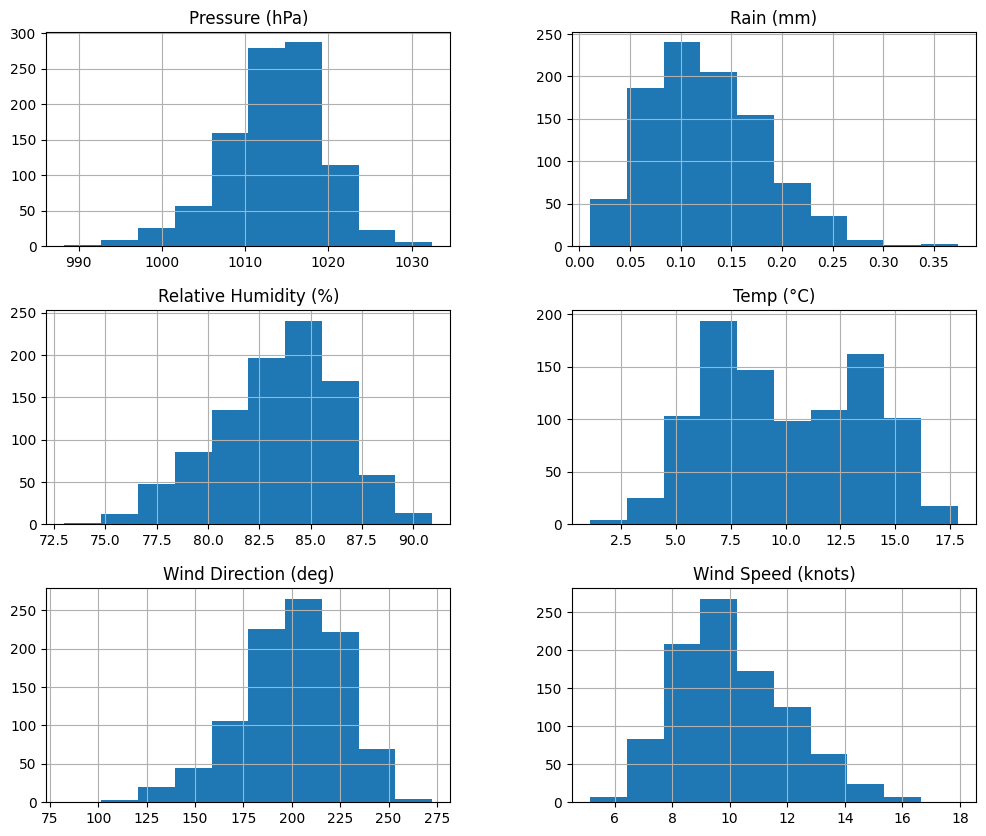

In [48]:
monthly_weather.hist(figsize= (12,10))
plt.show()

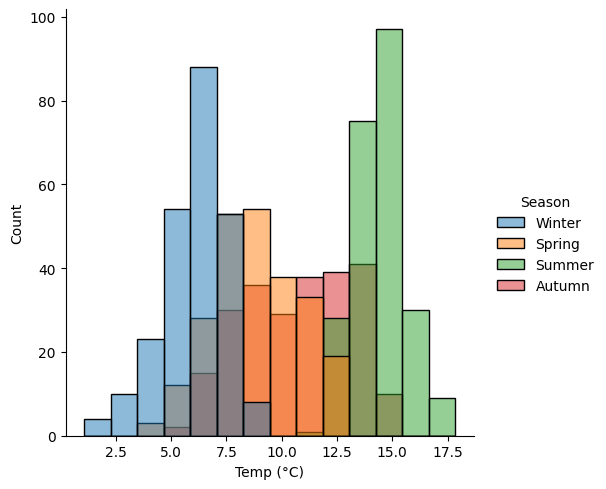

In [71]:
sns.displot(data = monthly_weather, x = 'Temp (°C)', hue= 'Season')
plt.show()

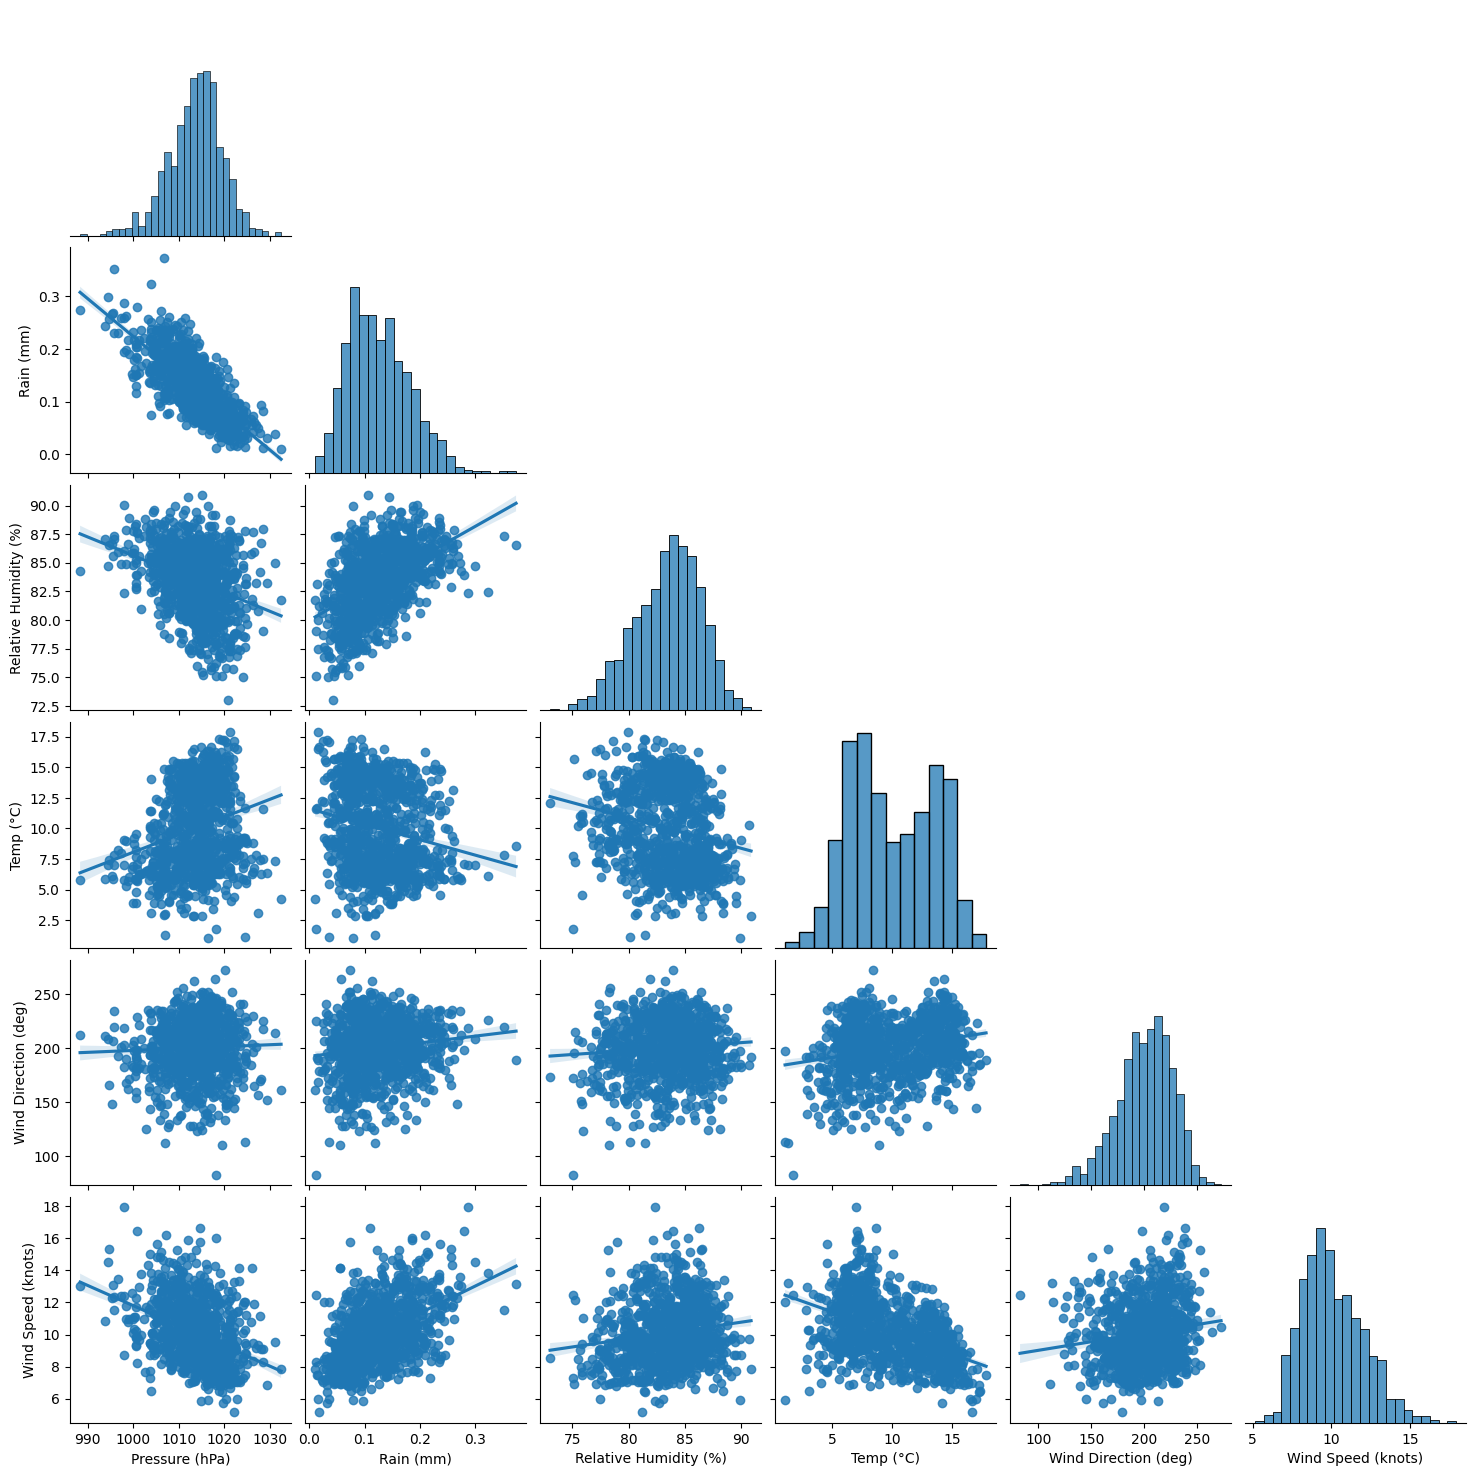

In [49]:
sns.pairplot(data= monthly_weather, kind= 'reg', corner = True)
plt.show()

In [72]:
sns.heatmap(monthly_weather.corr(), numeric)

ValueError: could not convert string to float: 'Winter'

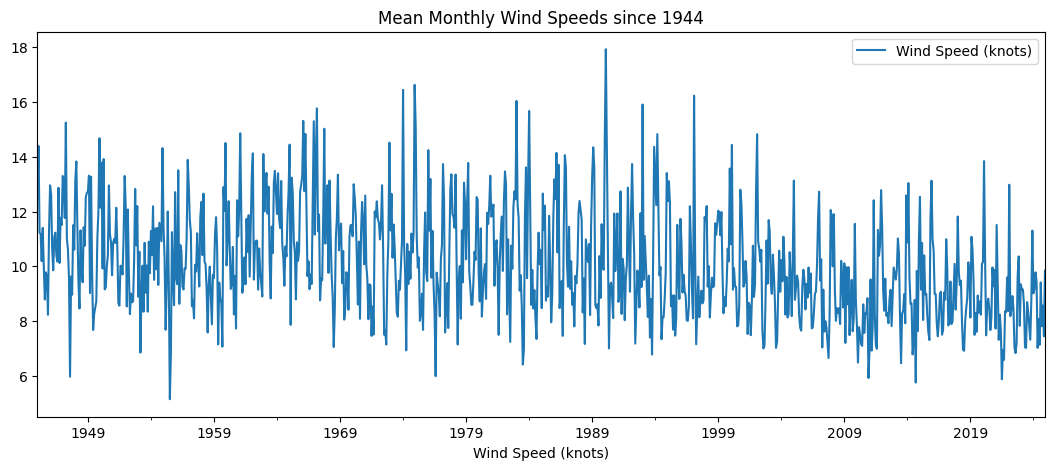

In [50]:
fig, ax = plt.subplots(figsize = (13,5))

monthly_weather['Wind Speed (knots)'].plot(subplots= True, label = 'Wind Speed (knots)')
plt.legend()
plt.title('Mean Monthly Wind Speeds since 1944')
plt.xlabel('Wind Speed (knots)')

plt.show()

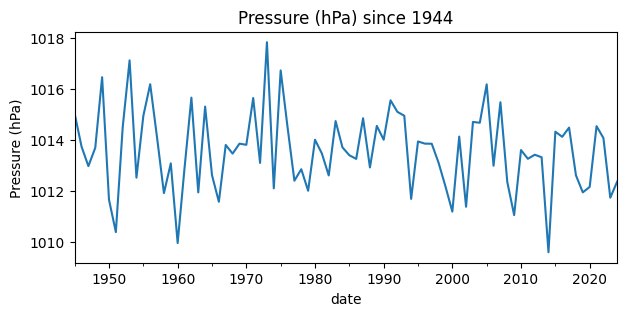

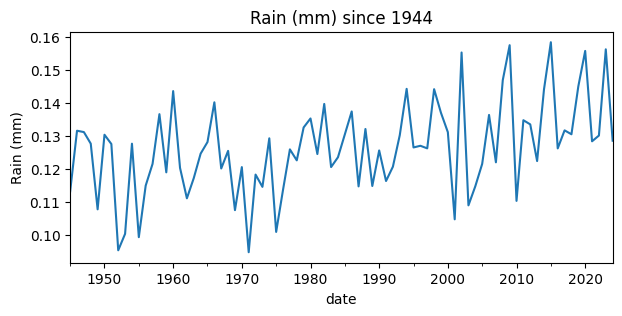

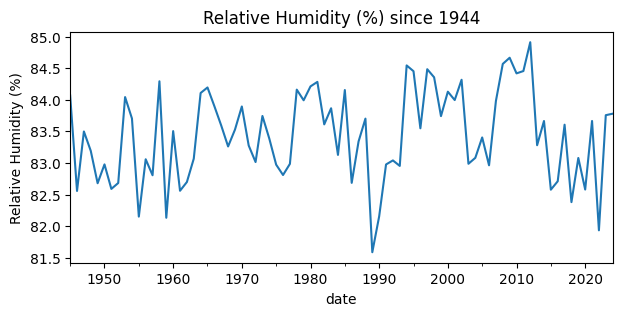

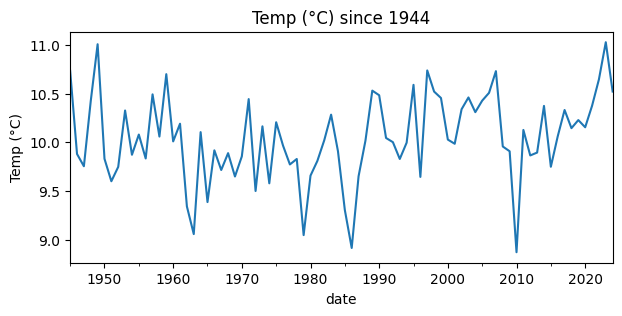

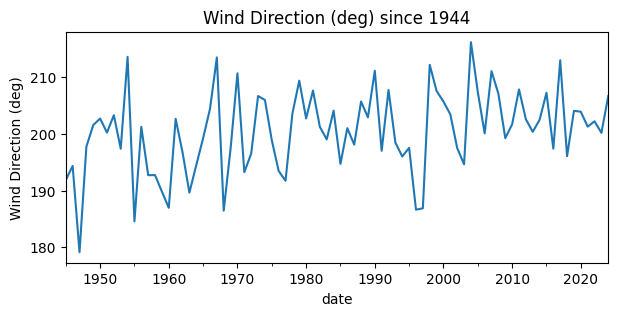

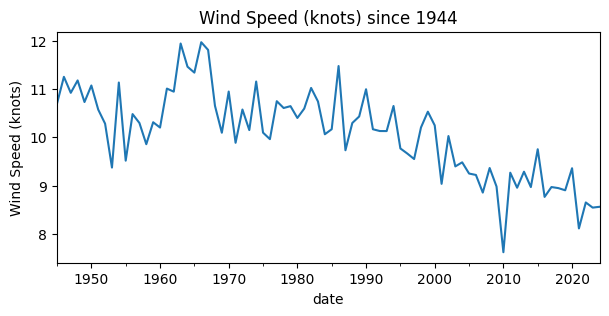

In [54]:
for col in yearly_weather:
    if yearly_weather[col].dtypes == 'float':
        fig, ax = plt.subplots(figsize = (7,3))
        yearly_weather[col].plot(subplots= True)

        plt.title(f'{col} since 1944')
        plt.ylabel(col)
        plt.savefig(f'plots/{col}.png')
        plt.show()

In [55]:
full_weather.corr().round(3)

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
Pressure (hPa),1.000,-0.358,-0.132,0.086,-0.048,-0.398
Rain (mm),-0.358,1.000,0.237,0.011,-0.047,0.267
Relative Humidity (%),-0.132,0.237,1.000,-0.192,-0.091,-0.210
Temp (°C),0.086,0.011,-0.192,1.000,0.069,0.033
Wind Direction (deg),-0.048,-0.047,-0.091,0.069,1.000,0.191
Wind Speed (knots),-0.398,0.267,-0.210,0.033,0.191,1.000


In [56]:
index_month = full_weather.index.month

In [57]:
windspeed_by_month = full_weather.groupby(index_month)['Wind Speed (knots)'].agg(['max', 'mean'])
print(windspeed_by_month)

        max       mean
date                  
1     43.50  11.533168
2     41.50  11.468020
3     35.33  10.982520
4     40.33   9.971416
5     31.50   9.541666
6     31.75   8.984722
7     28.67   8.670804
8     32.25   8.635403
9     37.75   9.407126
10    36.00  10.132523
11    38.25  10.457651
12    44.33  11.350405


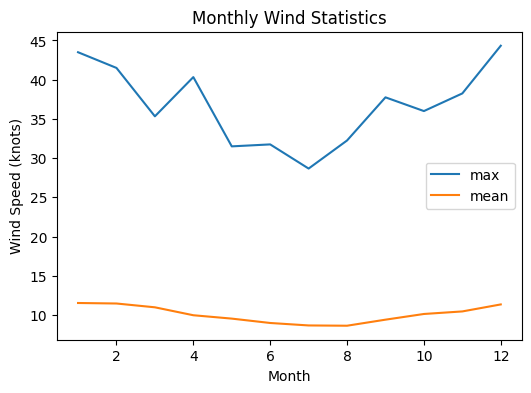

In [58]:
fig, ax = plt.subplots(figsize = (6,4))
windspeed_by_month.plot(ax = ax)

plt.xlabel('Month')
plt.ylabel('Wind Speed (knots)')
plt.title('Monthly Wind Statistics')

plt.show()

Has the wind direction changed? 

## Rolling mean

In [59]:
monthly_weather['rolling_wind_speed_12'] = monthly_weather['Wind Speed (knots)'].rolling(12).mean()


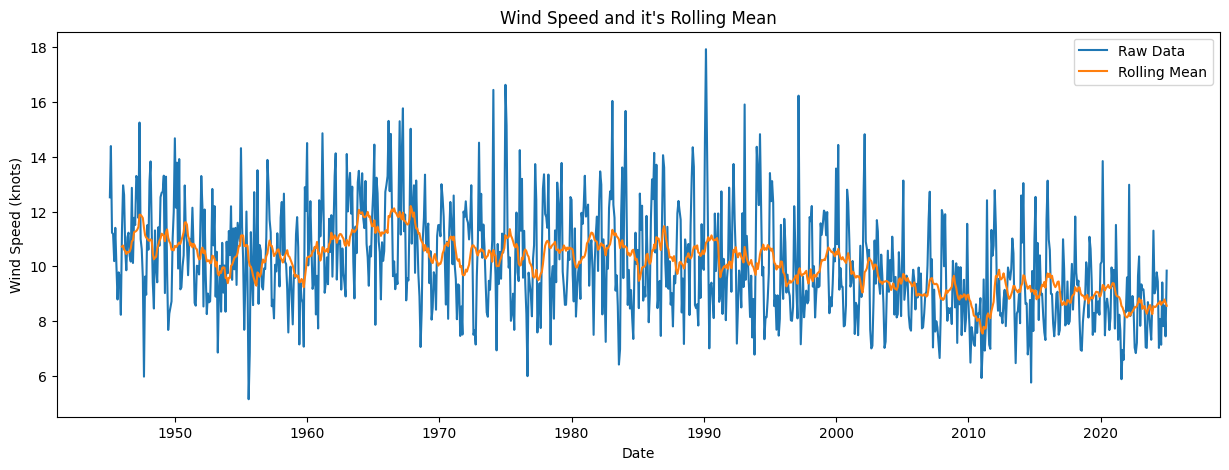

In [24]:
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(monthly_weather['Wind Speed (knots)'], label = 'Raw Data')
plt.plot(monthly_weather['rolling_wind_speed_12'], label = 'Rolling Mean')

plt.title("Wind Speed and it's Rolling Mean")
plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')

plt.legend()
plt.show()

In [60]:
yearly_weather['rolling_wind_speed_3'] = yearly_weather['Wind Speed (knots)'].rolling(3).mean()


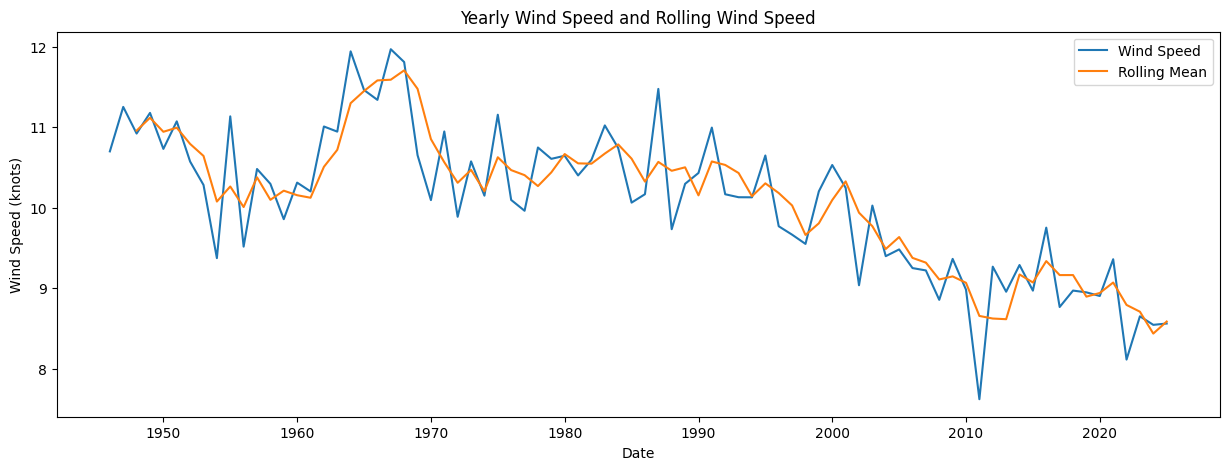

In [61]:
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(yearly_weather['Wind Speed (knots)'], label = 'Wind Speed')
plt.plot(yearly_weather['rolling_wind_speed_3'], label = 'Rolling Mean')

plt.legend()

plt.title('Yearly Wind Speed and Rolling Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')
plt.savefig('plots/Wind_speed_rolling.png')
plt.show()

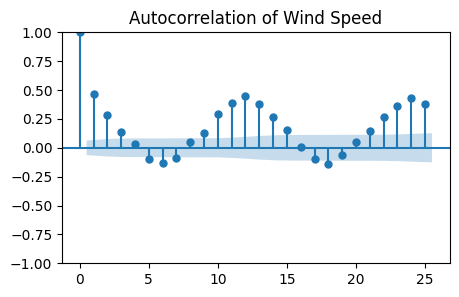

In [62]:
from statsmodels.graphics import tsaplots

rcParams['figure.figsize'] = 5, 3
tsaplots.plot_acf(monthly_weather['Wind Speed (knots)'], lags= 25)

plt.title('Autocorrelation of Wind Speed')
plt.savefig('plots/acf_windspeed.png')


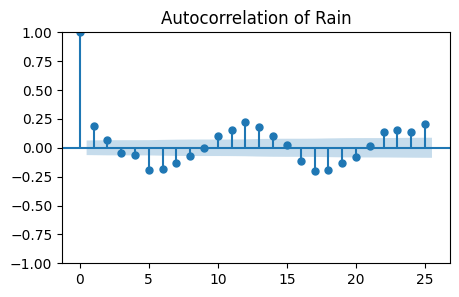

In [63]:
rcParams['figure.figsize'] = 5, 3

tsaplots.plot_acf(monthly_weather['Rain (mm)'], lags= 25)

plt.title('Autocorrelation of Rain')
plt.savefig('plots/acf_rain.png')

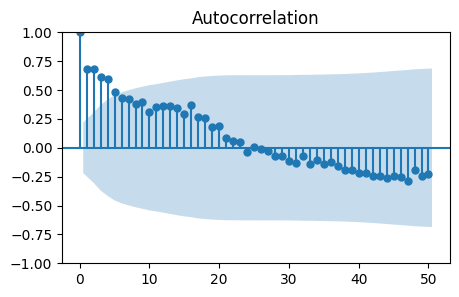

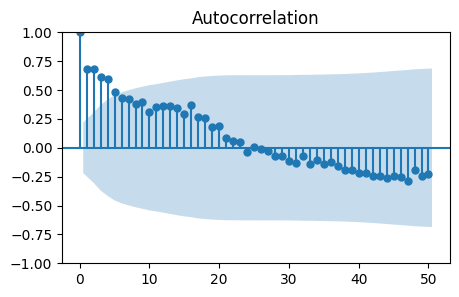

In [64]:
tsaplots.plot_acf(yearly_weather['Wind Speed (knots)'], lags= 50)

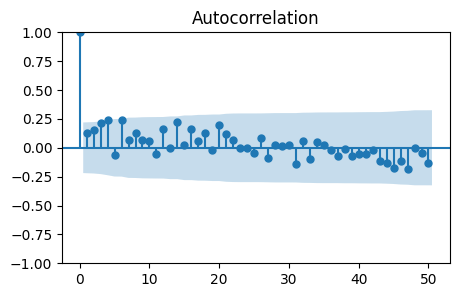

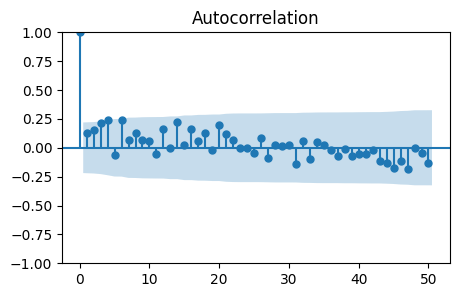

In [65]:
tsaplots.plot_acf(yearly_weather['Rain (mm)'], lags= 50)

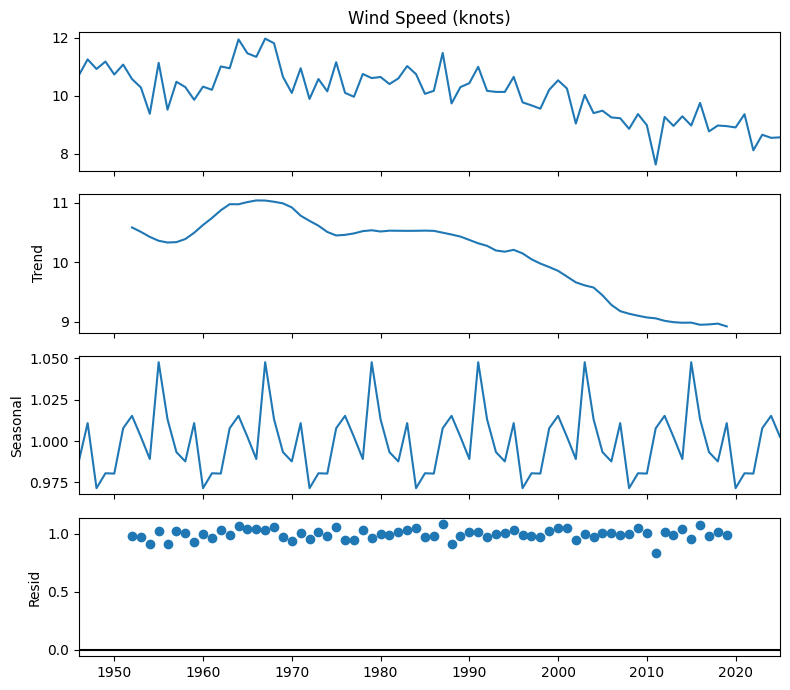

In [66]:
# Wind Speed Decomposition

rcParams['figure.figsize'] = 8, 7

decomposition = sm.tsa.seasonal_decompose(yearly_weather['Wind Speed (knots)'], model= 'mul', period = 12)
fig = decomposition.plot()

plt.savefig('plots/seasonal_windspeed.png')


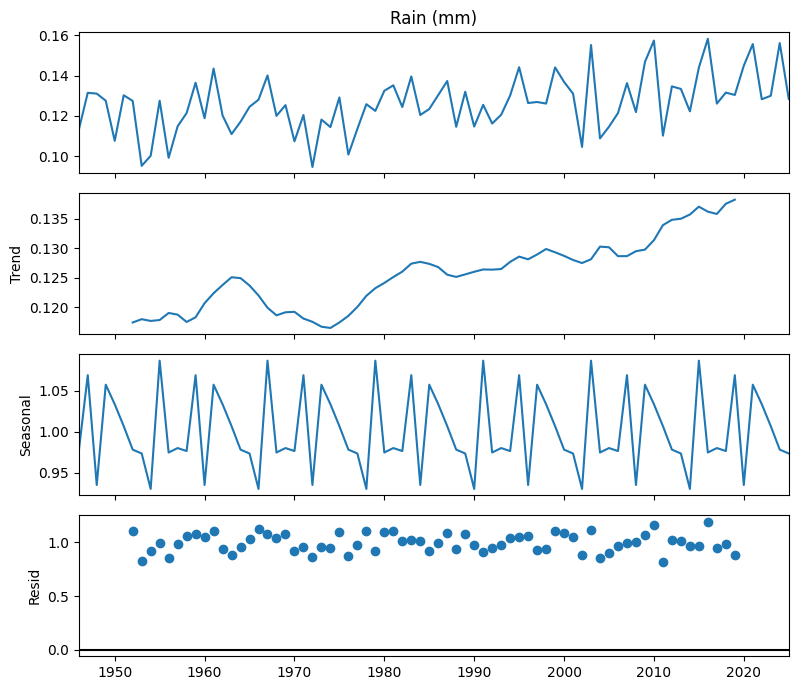

In [67]:
decomposition = sm.tsa.seasonal_decompose(yearly_weather['Rain (mm)'], model= 'mul', period = 12)
fig = decomposition.plot()

plt.savefig('plots/seasonal_rain.png')


The discussion of the trends in weather are found in [wind_energy_analysis.ipynb](wind_energy_analysis.ipynb)

***
End